In [1]:
import py_stringsimjoin as ssj

In [2]:
A, B = ssj.load_person_dataset()

In [3]:
import pandas as pd

In [61]:
def concat(*args):
    strs = [str(arg) for arg in args if not pd.isnull(arg)]
    ret_val = ' '.join(strs) if strs else ''
    return ret_val.strip()

In [62]:
%time concat('name', 12)

CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 19.8 µs


'name 12'

In [63]:
import numpy as np

In [64]:
np_concat = np.vectorize(concat)

In [45]:
A

,A.id,A.name,A.birth_year,A.hourly_wage,A.address,A.zipcode
0,a1,Kevin Smith,1989,30.0,"607 From St, San Francisco",94107.0
1,a2,Michael Franklin,1988,27.5,"1652 Stockton St, San Francisco",94122.0
2,a3,William Bridge,1986,32.0,"3131 Webster St, San Francisco",94107.0
3,a4,Binto George,1987,32.5,"423 Powell St, San Francisco",94122.0
4,a5,Alphonse Kemper,1984,35.0,"1702 Post Street, San Francisco",94122.0
5,a6,,1990,40.0,"24th Street, San Francisco",94122.0
6,a7,NaN,1986,25.0,"20th Street, San Francisco",NaN


In [48]:
x = np_concat([A['A.id'], A['A.name']])

TypeError: 'float' object is not iterable

In [31]:
x

array([['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7'],
       ['Kevin Smith', 'Michael Franklin', 'William Bridge',
        'Binto George', 'Alphonse Kemper', '', ''],
       ['1989', '1988', '1986', '1987', '1984', '1990', '1986']], 
      dtype='<U16')

In [52]:
import pandas as pd

In [53]:
C = pd.read_csv('datasets/movies.csv')

In [54]:
def concat_itertuples(A):
    for t in A.itertuples(index=False):
        strs = [str(arg) for arg in t if not pd.isnull(arg)]
        ret_val = ' '.join(strs) if strs else ''
        #print(ret_val)
        

In [28]:
B = A[['A.id', 'A.name', 'A.birth_year']]

In [55]:
%time concat_itertuples(C)

CPU times: user 30.1 s, sys: 41.8 ms, total: 30.1 s
Wall time: 30.2 s


In [57]:
C.columns

Index(['id', 'title', 'year', 'length', 'budget', 'rating', 'votes', 'r1',
       'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'mpaa', 'Action',
       'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short'],
      dtype='object')

In [70]:
tuple t

SyntaxError: invalid syntax (<ipython-input-70-1723b8ba8ad6>, line 1)

In [90]:
%time s = np_concat((*C[['id', 'title', 'year', 'length']].T.values))

CPU times: user 4.16 s, sys: 454 ms, total: 4.61 s
Wall time: 4.69 s


In [91]:
%time C['temp'] = s

CPU times: user 707 ms, sys: 489 ms, total: 1.2 s
Wall time: 1.7 s


In [1]:
import dask 

In [3]:
from dask import delayed

In [78]:
def inc(x):
    return x + 1

def double(x, f):
    return f(x + 2)

def add(x, y):
    return x + y

data = [1]

In [79]:
def fn(x):
    return x*x

In [85]:
output = []
for x in data:
    a = delayed(inc)(x)
    b = delayed(inc)(x)
    c = delayed(add)(a, b)
    output.append(c)

total = delayed(sum)(output)

In [86]:
d = dict(total.dask)

In [87]:
d

{'add-68812b16-91b1-40da-839a-c8b1f595404d': (<function __main__.add>,
  'inc-7ae857b4-cf03-4215-b003-1b309068d7af',
  'inc-77215b53-a464-44a0-a2a1-2257fe96ff21'),
 'inc-77215b53-a464-44a0-a2a1-2257fe96ff21': (<function __main__.inc>, 1),
 'inc-7ae857b4-cf03-4215-b003-1b309068d7af': (<function __main__.inc>, 1),
 'sum-ae6fd66d-6bb0-4d3a-909d-31b3ec25674a': (<function sum>,
  ['add-68812b16-91b1-40da-839a-c8b1f595404d'])}

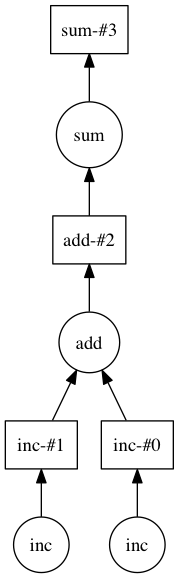

In [88]:
total.visualize(optimize_graph=True)

In [65]:
total.compute()

4

In [48]:
import py_stringsimjoin as ssj

In [49]:
t1 = ssj.edit_distance_join

In [50]:
t1.__code__.co_code

b'd\x01d\x02l\x00m\x01}\x11\x01\x00|\x11rDd\x01d\x03l\x02m\x03}\x12\x01\x00|\x12|\x00|\x01|\x02|\x03|\x04|\x05|\x06|\x07|\x08|\t|\n|\x0b|\x0c|\r|\x0e|\x0f|\x10\x83\x11S\x00d\x01d\x04l\x04m\x05}\x13\x01\x00|\x13|\x00|\x01|\x02|\x03|\x04|\x05|\x06|\x07|\x08|\t|\n|\x0b|\x0c|\r|\x0e|\x0f|\x10\x83\x11S\x00d\x00S\x00'

In [55]:
from py_stringsimjoin import jaccard_join

In [52]:
t2 = edit_distance_join

In [57]:
t2.__code__.co_code

b't\x00|\x00d\x01\x83\x02\x01\x00t\x00|\x01d\x02\x83\x02\x01\x00t\x01\x88\x03|\x00j\x02d\x03d\x01\x83\x04\x01\x00t\x01\x88\x0b|\x01j\x02d\x03d\x02\x83\x04\x01\x00t\x01\x88\x02|\x00j\x02d\x04d\x01\x83\x04\x01\x00t\x01\x88\n|\x01j\x02d\x04d\x02\x83\x04\x01\x00t\x03\x88\x02|\x00\x88\x02\x19\x00j\x04d\x04d\x01\x83\x04\x01\x00t\x03\x88\n|\x01\x88\n\x19\x00j\x04d\x04d\x02\x83\x04\x01\x00t\x05\x88\x12\x83\x01\x01\x00t\x06\x88\x11d\x05\x83\x02\x01\x00t\x07\x88\x01d\x05\x83\x02\x01\x00t\x08\x88\x04|\x00j\x02\x88\x0c|\x01j\x02\x83\x04\x01\x00t\t\x88\x03|\x00d\x01\x83\x03\x01\x00t\t\x88\x0b|\x01d\x02\x83\x03\x01\x00d\x06}\x12\x88\x12j\n\x83\x00s\xdc\x88\x12j\x0bd\x07\x83\x01\x01\x00d\x07}\x12t\x0c\x88\x04\x88\x03\x83\x02\x89\x04t\x0c\x88\x0c\x88\x0b\x83\x02\x89\x0ct\r\x88\x04\x88\x03\x88\x02\x83\x03\x89\x06t\r\x88\x0c\x88\x0b\x88\n\x83\x03\x89\x0et\x0e|\x00\x88\x06\x88\x02\x83\x03\x89\x07t\x0e|\x01\x88\x0e\x88\n\x83\x03}\x13t\x0ft\x10\x88\x08\x83\x01t\x11|\x13\x83\x01\x83\x02\x89\x08\x88\x08d\x08

In [58]:
t1.__code__.co_code == t2.__code__.co_code

False

In [56]:
t2 = jaccard_join

In [1]:
from dask import delayed

In [20]:
@delayed(pure=True)
def add(a, b):
    return a + b

In [23]:
@delayed(pure=True)
def inc(x):
    return (add)(x, x)

In [24]:
k = 5
x = inc(k)
y = inc(x)
z = add(x, y)

In [25]:
dict(z.dask)

{'add-0f515f0e4c9e42c22572026b4e5f45ec': (<function __main__.add>,
  'inc-b678687b742b63610bd6ba7a795a8be4',
  'inc-5340fa8c02d2c8e1d59f3eb11cc0945c'),
 'inc-5340fa8c02d2c8e1d59f3eb11cc0945c': (<function __main__.inc>,
  'inc-b678687b742b63610bd6ba7a795a8be4'),
 'inc-b678687b742b63610bd6ba7a795a8be4': (<function __main__.inc>, 5)}

In [28]:
def temp(k):
    x = inc(k)
    y = inc(x)
    z = add(x, y)
    return z

In [40]:
x = temp(5)

In [41]:
y = temp(x)

In [44]:
tt = y.compute()

In [46]:
tt.compute()

180

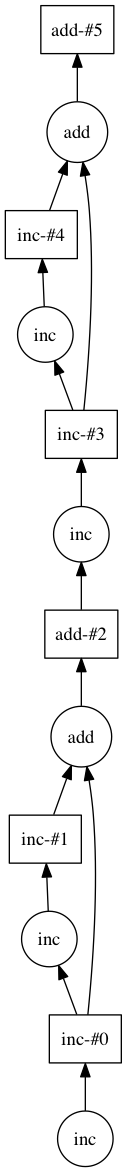

In [42]:
y.visualize()